# Count Vectorizer: Bag of Words on Snopes Data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Data/SnopesGeneralDatav3.csv')

# 2 -> Other / Mixture/ All other labels
# 1 -> Fake / False
# 0 -> Not Fake / True

In [3]:
data.head()

,ID,Posts,Label
0,1,Did Kamala Harris Support Abortion Until the T...,Mixture
1,2,Did Hitler Invent the Inflatable Sex Doll?,FALSE
2,3,Pride Parade Fire Hydrant Mishap,FALSE
3,4,Did Trump Say He Might Sign an Exec Order Barr...,Mixture
4,5,Did the White House Watch the Benghazi Attack ...,FALSE


In [7]:
# For binary classsification

label = { 'FALSE': 0, 'TRUE': 1, 'Mixture': 1 } 

data.Label = [label[item] for item in data.Label]

In [11]:
data['Label'].unique()

array([1, 0], dtype=int64)

In [12]:
data['Label'].value_counts()

0    1756
1    1203
Name: Label, dtype: int64

In [17]:
# Remove label from data

X = data.drop(['ID', 'Label'], axis = 1)
X.head()

,Posts
0,Did Kamala Harris Support Abortion Until the T...
1,Did Hitler Invent the Inflatable Sex Doll?
2,Pride Parade Fire Hydrant Mishap
3,Did Trump Say He Might Sign an Exec Order Barr...
4,Did the White House Watch the Benghazi Attack ...


In [18]:
# Store results

Y = data['Label']
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: Label, dtype: int64

In [19]:
X.shape, Y.shape

((2959, 1), (2959,))

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
messages = data.copy()

In [29]:
messages.head(10)

,ID,Posts,Label
0,1,Did Kamala Harris Support Abortion Until the T...,1
1,2,Did Hitler Invent the Inflatable Sex Doll?,0
2,3,Pride Parade Fire Hydrant Mishap,0
3,4,Did Trump Say He Might Sign an Exec Order Barr...,1
4,5,Did the White House Watch the Benghazi Attack ...,0
5,6,Do Color Codes on Toothpaste Tubes Identify Th...,0
6,7,Did the Last Surviving WWII Veteran March Alon...,0
7,8,Did Ruth Bader Ginsburg Say that Pedophilia Wa...,0
8,9,Bow Hunting Wild Horses,1
9,10,Dwayne Johnson Arrested,0


In [30]:
messages['Posts'][0]

'Did Kamala Harris Support Abortion Until the Time of Giving Birth?'

In [31]:
# Stemming and stop word removal

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
#     type(messages['title'][i])
    review = re.sub('[^a-zA-Z]', ' ', str(messages['Posts'][i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
corpus

['kamala harri support abort time give birth',
 'hitler invent inflat sex doll',
 'pride parad fire hydrant mishap',
 'trump say might sign exec order bar biden presid',
 'white hous watch benghazi attack noth',
 'color code toothpast tube identifi ingredi',
 'last surviv wwii veteran march alon memori day parad',
 'ruth bader ginsburg say pedophilia good children',
 'bow hunt wild hors',
 'dwayn johnson arrest',
 'firework explod woman shoplift attempt',
 'tim horton ad marijuana menu',
 'obama remov statu liberti offend muslim',
 'year old mama esifiho may oldest woman aliv',
 'cop shoot year old black babi mistak pacifi gun',
 'harvard studi reveal much damag instant noodl bodi',
 'alton sterl kill trump support robert kinnison',
 'monsanto buy whole food',
 'photograph show alton sterl children gun',
 'alton sterl longtim crimin gang member',
 'deray mckesson summer chao',
 'obama commiss gender neutral bibl',
 'dalla shooter identifi neo nazi jeffrey harri',
 'pride lion kill five

In [33]:
# Applying Count Vectorizer
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 5000, ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

In [35]:
Y = messages['Label']

In [36]:
# Train and Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [37]:
cv.get_feature_names()[:10]

['aarp',
 'abandon',
 'abc',
 'abduct',
 'abduct warn',
 'abedin',
 'abort',
 'abort babi',
 'abort time',
 'abort time give']

In [38]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [39]:
count_data = pd.DataFrame(X_train, columns = cv.get_feature_names())

In [40]:
count_data.head()

,aarp,abandon,abc,abduct,abduct warn,abedin,abort,abort babi,abort time,abort time give,...,yellowston,york,york citi,york polic,young,young girl,younger,zealand,zebra,zika
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
import matplotlib.pyplot as plt

In [42]:
# Custom Confusion matrix plotter

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [43]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

In [44]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy:   0.615
Confusion matrix, without normalization


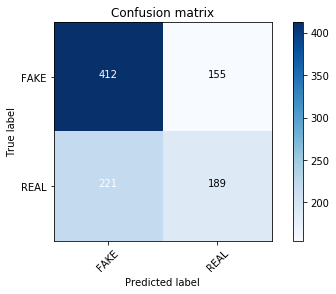

In [45]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

In [46]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:    %0.3f" % score)

Accuracy:    0.615


In [47]:
# Passive Aggressive Classifier Algorithm

from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier()

Accuracy:   0.572
Confusion matrix, without normalization


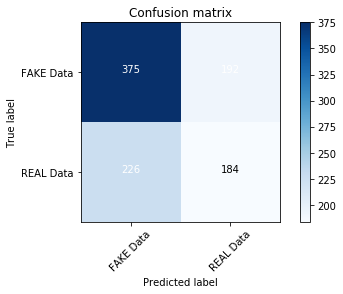

In [48]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE Data', 'REAL Data'])

In [49]:
# Multinomial Classifier with Hyperparameter tuning

classifier = MultinomialNB(alpha = 0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Akash Selvakumar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.5977482088024565
Alpha: 0.1, Score : 0.601842374616172
Alpha: 0.2, Score : 0.5987717502558854
Alpha: 0.30000000000000004, Score : 0.6028659160696008
Alpha: 0.4, Score : 0.6079836233367452
Alpha: 0.5, Score : 0.6120777891504606
Alpha: 0.6000000000000001, Score : 0.609007164790174
Alpha: 0.7000000000000001, Score : 0.6151484135107472
Alpha: 0.8, Score : 0.6120777891504606
Alpha: 0.9, Score : 0.617195496417605


In [50]:
# Best: Alpha 0.9 Score = 0.617

In [51]:
# Get Features names
feature_names = cv.get_feature_names()

In [52]:
classifier.coef_[0]

array([-9.31640064, -8.14632939, -9.31640064, ..., -8.56918624,
       -8.56918624, -8.14632939])

In [53]:
# Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.558032611688205, 'trump'),
 (-5.576089015002076, 'covid'),
 (-5.71756746931913, 'clinton'),
 (-5.882413438263136, 'protest'),
 (-5.918913840482663, 'presid'),
 (-5.956797158384964, 'polic'),
 (-5.956797158384964, 'obama'),
 (-5.956797158384964, 'kill'),
 (-5.996172323619794, 'show'),
 (-5.996172323619794, 'peopl'),
 (-6.037161668152991, 'say'),
 (-6.037161668152991, 'donald trump'),
 (-6.037161668152991, 'donald'),
 (-6.171290968119691, 'white'),
 (-6.171290968119691, 'hillari clinton'),
 (-6.171290968119691, 'hillari'),
 (-6.220320395360009, 'use'),
 (-6.220320395360009, 'ban'),
 (-6.326239414243747, 'texa'),
 (-6.326239414243747, 'million')]

In [54]:
# Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-9.316400642748283, 'aarp'),
 (-9.316400642748283, 'abc'),
 (-9.316400642748283, 'abduct'),
 (-9.316400642748283, 'abduct warn'),
 (-9.316400642748283, 'abedin'),
 (-9.316400642748283, 'abort babi'),
 (-9.316400642748283, 'absente'),
 (-9.316400642748283, 'absente ballot'),
 (-9.316400642748283, 'accid'),
 (-9.316400642748283, 'accus sexual'),
 (-9.316400642748283, 'actual'),
 (-9.316400642748283, 'adam sandler'),
 (-9.316400642748283, 'adam sandler death'),
 (-9.316400642748283, 'addict'),
 (-9.316400642748283, 'address'),
 (-9.316400642748283, 'adolf'),
 (-9.316400642748283, 'adolf hitler'),
 (-9.316400642748283, 'advanc'),
 (-9.316400642748283, 'advertis'),
 (-9.316400642748283, 'advis')]